# Exploring the different linear regressions which use the `hime.LinearRegression` class as the `BaseEstimator`

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import session_info

In [2]:
current_wd = os.getcwd()
os.chdir(current_wd.split("/notebook")[0])
from hime.linear_model import LinearRegression, LassoRegression, RidgeRegression
os.chdir(current_wd)

In [3]:
session_info.show(write_req_file=False)

## Make X and y data

In [4]:
amount_of_features = 4
X, y, coef = make_regression(n_samples=100,
    n_features=amount_of_features,
    n_informative=amount_of_features,
                             noise=5,
                             coef=True, 
                            random_state=42)

In [5]:
coef

array([86.47223763,  5.63754967, 27.34070719, 41.48195023])

## Fit the model

In [6]:
df = (pd.DataFrame(X, columns=[f"feat_{x}" for x in range(0, X.shape[1])])
.merge(pd.DataFrame(y, columns=["target"]),
      left_index=True,
      right_index=True))

In [7]:
df.head()

,feat_0,feat_1,feat_2,feat_3,target
0,0.852433,-0.661786,0.186454,-2.025143,-8.751790
1,-0.493001,-0.208122,-0.622700,0.280992,-40.948309
2,-1.142970,0.058209,0.153725,-0.883857,-126.192510
3,0.375698,-1.150994,0.110923,-0.544383,7.050788
4,-1.196207,-1.106335,-0.185659,-0.479174,-134.050438


In [8]:
df_train = df.sample(frac=0.8, random_state=69420)
df_test = df.drop(df_train.index)

In [9]:
df_train.shape, df_test.shape

((80, 5), (20, 5))

## Fit the romeo LinearRegression

In [10]:
reg = LinearRegression(fit_intercept=True,
                      normalize=True).fit(X=df_train.filter(regex="feat"), 
                                               y=df_train["target"], 
                                               verbose=False)

In [11]:
reg.summary_

,coef,std_err,t,P>|t|,[0.025,0.975]
intercept,-0.171726,0.651993,-0.263386,7.929751e-01,-1.470563,1.127110
feat_0,87.155885,0.701928,124.166366,1.410762e-88,85.757572,88.554198
feat_1,5.751563,0.655423,8.775339,3.983391e-13,4.445893,7.057234
feat_2,26.934038,0.660686,40.766763,6.241126e-53,25.617884,28.250193
feat_3,40.459461,0.767188,52.737353,4.910777e-61,38.931144,41.987777


## Fit the romeo LassoRegression

In [12]:
reg = LassoRegression(fit_intercept=True,
                      normalize=True).fit(X=df_train.filter(regex="feat"), 
                                               y=df_train["target"], 
                                               verbose=False)

In [13]:
reg.summary_

,coef,std_err,t,P>|t|,[0.025,0.975]
intercept,-0.165649,0.675911,-0.245075,8.070673e-01,-1.512133,1.180835
feat_0,87.147864,0.727678,119.761519,2.089901e-87,85.698254,88.597474
feat_1,5.743241,0.679468,8.452562,1.640541e-12,4.389673,7.096810
feat_2,26.927887,0.684923,39.315186,8.396310e-52,25.563450,28.292325
feat_3,40.449371,0.795332,50.858473,6.934968e-60,38.864989,42.033754


In [14]:
reg.fit_evaluation_.round(3)

,r_squared,r_squared_adj,f_statistic,f_statistic_pvalue,log_likelihood,AIC,BIC
model_evaluation,0.997,0.997,5759.773,0.0,-247.64,503.28,512.808


## Fit the romeo RidgeRegression

In [15]:
reg = RidgeRegression(fit_intercept=True,
                      normalize=True).fit(X=df_train.filter(regex="feat"), 
                                               y=df_train["target"], 
                                               verbose=False)

In [16]:
reg.summary_

,coef,std_err,t,P>|t|,[0.025,0.975]
intercept,-0.186703,0.599692,-0.311331,7.564130e-01,-1.381351,1.007946
feat_0,85.903044,0.645622,133.054681,8.082439e-91,84.616899,87.189189
feat_1,5.438884,0.602848,9.021987,1.352162e-13,4.237950,6.639819
feat_2,26.708260,0.607688,43.950589,2.773902e-55,25.497683,27.918837
feat_3,39.636512,0.705647,56.170465,4.864308e-63,38.230791,41.042233


In [17]:
reg.fit_evaluation_.round(3)

,r_squared,r_squared_adj,f_statistic,f_statistic_pvalue,log_likelihood,AIC,BIC
model_evaluation,0.997,0.996,5408.375,0.0,-250.155,508.311,517.839


In [18]:
intercept = reg.intercept_
coefs = reg.coef_

## Plot the original data and the lines of best fit for each of the predictors on the target

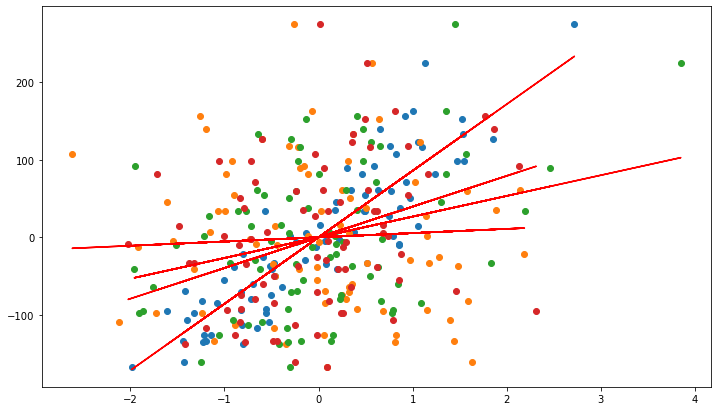

In [19]:
_ = plt.figure(figsize=(12, 7))
_ = plt.plot(df_train.filter(regex="feat"), 
             df_train["target"], 
             'o', 
             label='original data')
_ = plt.plot(df_train.filter(regex="feat"), 
             intercept + coefs*df_train.filter(regex="feat"), 
             'r', 
             label='fitted line')
# _ = plt.legend()

## With the fitted model attempt to predict the test data

In [20]:
y_pred = reg.predict(df_test.filter(regex="feat"))
y_pred.head(2)

,y_pred
9,28.745442
23,216.434209


In [21]:
y_test = df_test[["target"]]
y_test.head(2)

,target
9,34.902372
23,219.457181


## Calculate the r2 between the predicted vs the real scores

In [22]:
r_sq = r2_score(y_test["target"], 
        y_pred)
r_sq

0.997902689598276

## Plot the predicted vs the real values

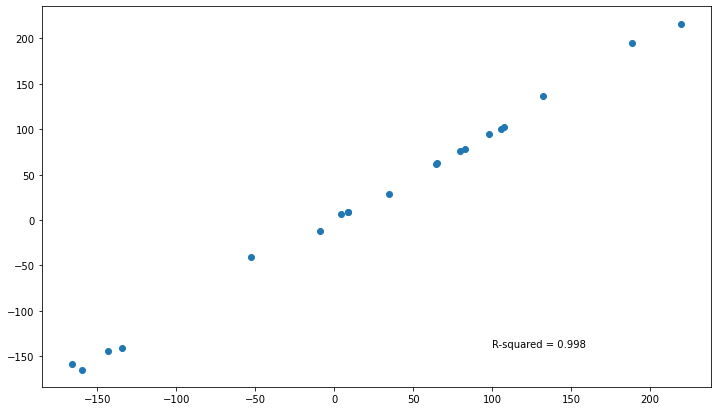

In [23]:
_ = plt.figure(figsize=(12, 7))
_ = plt.plot(y_test["target"], 
             y_pred, 
             'o', 
#              label='original data'
            )
_ = plt.annotate(text = f"R-squared = {round(r_sq, 3)}",
                 xy=(100, -140),)